###Integrantes:

###Rocio Quispe - Facundo Torino Comisión 2.

##TRABAJO PRÁCTICO FINAL DE PANDAS
1. Análisis de Datos de la línea 144 utilizando Pandas
  
  1.1. Objetivo
El objetivo de este trabajo práctico es que los estudiantes adquieran experiencia en la manipulación y análisis
de datos utilizando la librería pandas en Python, aplicando conceptos de programación y estadísticas a un
conjunto de datos de la línea 144 utilizando Pandas.
  
  1.2. Conjunto de Datos
La linea 144 brinda atención, contención y asesoramiento a personas en situación de violencia de género. Esta
línea fue creada en 2013 para cumplir con la ley Nº 26.485 (más información en: https://www.argentina.gob.ar/capital-humano/generos/linea-144).
Se dispone de archivos de datos sobre las llamadas recibidas por este número. Cada registro representa una
llamada e incluye información como la fecha, la provincia, el género de la persona que llama, su edad, su nacionalidad, entre otros datos. Los mismos pueden consultarse y descargarse en el sitio https://www.datos.gob.ar/dataset/generos-base-datos-linea-144. En el mismo sitio pueden consultarse los campos con
sus tipos de datos y descripción.
En este trabajo práctico se analizarán los datos correspondientes a los años 2020 al 2022 (no incluiremos los datos del año 2023 por no estar completos).

In [539]:
! gdown 11XrNwsI8jUtyrwdj756n1EpIDflrImpt
! gdown 1UysBTNZomVH5Q-x2LdqMUAE2cWXKl9Lt
! gdown 1pnKHk7oBRK1CQIvVdfhm0dFbDlaZ5iI_

Downloading...
From: https://drive.google.com/uc?id=11XrNwsI8jUtyrwdj756n1EpIDflrImpt
To: /content/linea144-2020.csv
100% 2.76M/2.76M [00:00<00:00, 151MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UysBTNZomVH5Q-x2LdqMUAE2cWXKl9Lt
To: /content/linea144-2021.csv
100% 2.36M/2.36M [00:00<00:00, 169MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pnKHk7oBRK1CQIvVdfhm0dFbDlaZ5iI_
To: /content/linea144-enero-diciembre-2022.csv
100% 2.31M/2.31M [00:00<00:00, 174MB/s]


### 1.3. Descripción del Trabajo
  1. Carga de Datos: Los estudiantes deben cargar el conjunto de datos en un DataFrame de pandas.
  2. Limpieza de Datos: Los estudiantes deben realizar una limpieza inicial de los datos, incluyendo un
  análisis de valores faltantes y la identificación de posibles errores.
  3. Análisis Descriptivo: Los estudiantes deben realizar un análisis descriptivo de los datos, calculando estadísticas resumen (media, mediana, desviación estándar, etc.) para las variables relevantes. También deben visualizar los datos utilizando boxplot. ¿Existen valores atípicos?
  4. Análisis Temporal: Los estudiantes deben realizar un análisis temporal de los datos, calculando la
  evolución de las llamadas a lo largo del tiempo. ¿Hubo aumento de llamadas? ¿Hubo un cambio en las
  edades de quienes denuncian?
  5. Preguntas de Investigación: Plantear al menos tres preguntas de investigación relacionadas con los
  datos y utilizar pandas para responderlas. Por ejemplo, ¿cuál fue la edad promedio de los denunciantes de una provincia y un año específicos? ¿Cuál fue la provincia desde donde se realizaron más llamadas?

#1-**Carga de los datos**

In [540]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [541]:
df1 = pd.read_csv('linea144-2020.csv')
df2 = pd.read_csv('linea144-2021.csv')
df3 = pd.read_csv('linea144-enero-diciembre-2022.csv')

##2-Limpieza de datos

In [542]:
"""
PREGUNTA: si las series tienen el mismo nombre de columnas pero estàn en diferente orden ¿concat funciona igual?
"""
# Armamos 3 conjuntos con los nombres de las series de cada archivo para comparar si hay diferencias
series_2020 = set(df1.columns.tolist())
series_2021 = set(df2.columns.tolist())
series_2022 = set(df3.columns.tolist())


In [543]:
# Calculamos el Conjunto UNION de los tres
_union = series_2020 | series_2021 | series_2022
_union

{'Fecha',
 'Unnamed: 19',
 'edad_persona_en_situacion_de_violencia',
 'fecha',
 'genero_de_la_persona_agresora',
 'genero_persona_en_situacion_de_violencia',
 'modalidad_de_violencia_institucional',
 'modalidad_de_violencia_laboral',
 'modalidad_de_violencia_mediatica',
 'modalidad_de_violencia_obstetrica',
 'modalidad_de_violencia_otras',
 'modalidad_violencia_contra_libertad_reproductiva',
 'pais_nacimiento_persona_en_situacion_de_violencia',
 'prov_residencia_persona_en_situacion_violencia',
 'tipo_de_violencia_domestica',
 'tipo_de_violencia_economica_y_patrimonial',
 'tipo_de_violencia_fisica',
 'tipo_de_violencia_psicologica',
 'tipo_de_violencia_sexual',
 'tipo_de_violencia_simbolica',
 'vinculo_con_la_persona_agresora'}

In [544]:
# Calculamos el conjunto INTERSECCION entre los tres
_interseccion = series_2020.intersection(series_2021, series_2022)
_interseccion

{'edad_persona_en_situacion_de_violencia',
 'genero_de_la_persona_agresora',
 'genero_persona_en_situacion_de_violencia',
 'modalidad_de_violencia_institucional',
 'modalidad_de_violencia_laboral',
 'modalidad_de_violencia_mediatica',
 'modalidad_de_violencia_obstetrica',
 'modalidad_de_violencia_otras',
 'modalidad_violencia_contra_libertad_reproductiva',
 'pais_nacimiento_persona_en_situacion_de_violencia',
 'prov_residencia_persona_en_situacion_violencia',
 'tipo_de_violencia_domestica',
 'tipo_de_violencia_economica_y_patrimonial',
 'tipo_de_violencia_fisica',
 'tipo_de_violencia_psicologica',
 'tipo_de_violencia_sexual',
 'tipo_de_violencia_simbolica',
 'vinculo_con_la_persona_agresora'}

In [545]:
# Si los tres conjuntos son iguales, UNION - INTERSECCION debería dar cero.
_union - _interseccion
# RESULTADO: {'Fecha', 'Unnamed: 19', 'fecha'} lo que indica que los archivos .csv
# tienen series con diferente nombre. Hay que corregir ésto antes de concatenar los DataFrame.
# Vamos a busacar con .info() en donde están.

{'Fecha', 'Unnamed: 19', 'fecha'}

In [546]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24558 entries, 0 to 24557
Data columns (total 20 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Fecha                                              24558 non-null  object 
 1   prov_residencia_persona_en_situacion_violencia     24236 non-null  object 
 2   genero_persona_en_situacion_de_violencia           23939 non-null  object 
 3   edad_persona_en_situacion_de_violencia             19577 non-null  float64
 4   pais_nacimiento_persona_en_situacion_de_violencia  16407 non-null  object 
 5   tipo_de_violencia_fisica                           24558 non-null  object 
 6   tipo_de_violencia_psicologica                      24558 non-null  object 
 7   tipo_de_violencia_sexual                           24558 non-null  object 
 8   tipo_de_violencia_economica_y_patrimonial          24558 non-null  object 
 9   tipo_d

In [547]:
# Comenzamos por eliminar la columna "Unnamed: 19" en el archivo Año 2022 porque creimos que era irrelevante.
df3 = df3.drop('Unnamed: 19', axis=1)

In [548]:
# Empleamos .rename() para corregir el nombre de la serie  del archivo Año 2020
df3 = df3.rename(columns={'Fecha': 'fecha'})

In [549]:
# Con las correciones hechas, armamos un dataframe completo con los tres Años
df_completo = pd.concat([df1, df2, df3])

In [550]:
#Resetear los indices
df_completo = df_completo.reset_index(drop=True)
df_completo.head()


,fecha,prov_residencia_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora
0,2020-01-01,Tucumán,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,No,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon


In [551]:
df_completo.tail()

,fecha,prov_residencia_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora
79560,2022-12-31,Ciudad Autónoma de Buenos Aires,Mujer,NaN,NaN,No,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
79561,2022-12-31,Buenos Aires,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
79562,2022-12-31,NaN,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,NaN,Varon
79563,2022-12-31,Ciudad Autónoma de Buenos Aires,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Padre o tutor,Varon
79564,2022-12-31,Buenos Aires,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,NaN,Varon


In [552]:
print(df_completo.dtypes)

fecha                                                 object
prov_residencia_persona_en_situacion_violencia        object
genero_persona_en_situacion_de_violencia              object
edad_persona_en_situacion_de_violencia               float64
pais_nacimiento_persona_en_situacion_de_violencia     object
tipo_de_violencia_fisica                              object
tipo_de_violencia_psicologica                         object
tipo_de_violencia_sexual                              object
tipo_de_violencia_economica_y_patrimonial             object
tipo_de_violencia_simbolica                           object
tipo_de_violencia_domestica                           object
modalidad_de_violencia_institucional                  object
modalidad_de_violencia_laboral                        object
modalidad_violencia_contra_libertad_reproductiva      object
modalidad_de_violencia_obstetrica                     object
modalidad_de_violencia_mediatica                      object
modalidad_de_violencia_o

##3-Transformación del tipo de dato de las variables y Limpieza de los datos

In [553]:
#Transformando fecha en tipo datetime
df_completo['fecha'] = pd.to_datetime(df_completo['fecha'])
print(df_completo['fecha'].dtypes)

datetime64[ns]


In [554]:
#Transformando provincias en tipo string
df_completo['prov_residencia_persona_en_situacion_violencia'] = (
    df_completo['prov_residencia_persona_en_situacion_violencia'].astype('string'))

print(df_completo['prov_residencia_persona_en_situacion_violencia'].dtypes)

print(df_completo.prov_residencia_persona_en_situacion_violencia.unique())

string
<StringArray>
[                                              'Tucumán',
                                          'Buenos Aires',
                                   'Santiago Del Estero',
                                              'Santa Fe',
                                              'San Juan',
                                             'Catamarca',
                                               'Neuquén',
                                               'Mendoza',
                                               'Córdoba',
                                             'Río Negro',
                       'Ciudad Autónoma de Buenos Aires',
                                                 'Salta',
                                            'Entre Ríos',
                                                 'Jujuy',
                                                 'Chaco',
                                                'Chubut',
                                              'San 

In [555]:
#Normalizando nombres de provincias: Nombre(Santiago del Estero, Córdoba)
reemplazos = {
    'Santiago Del Estero': 'Santiago del Estero',
    'Cordoba': 'Córdoba',
}

#Corregimos nombres
df_completo['prov_residencia_persona_en_situacion_violencia'] = df_completo['prov_residencia_persona_en_situacion_violencia'].replace(reemplazos)

#Rellenamos <NA> con 'No especificado' porque consideramos que el valor aporta al total de violencia de genero
df_completo['prov_residencia_persona_en_situacion_violencia'] = df_completo['prov_residencia_persona_en_situacion_violencia'].fillna('No especificado')

print(df_completo.prov_residencia_persona_en_situacion_violencia.unique())



<StringArray>
[                                              'Tucumán',
                                          'Buenos Aires',
                                   'Santiago del Estero',
                                              'Santa Fe',
                                              'San Juan',
                                             'Catamarca',
                                               'Neuquén',
                                               'Mendoza',
                                               'Córdoba',
                                             'Río Negro',
                       'Ciudad Autónoma de Buenos Aires',
                                                 'Salta',
                                            'Entre Ríos',
                                                 'Jujuy',
                                                 'Chaco',
                                                'Chubut',
                                              'San Luis',


In [556]:
#Transformando (persona en situacion de violencia) en tipo string
df_completo['genero_persona_en_situacion_de_violencia'] = (
    df_completo['genero_persona_en_situacion_de_violencia'].astype('string'))

print(df_completo['genero_persona_en_situacion_de_violencia'].dtypes)

#Rellenamos <NA> con 'No especificado'
df_completo['genero_persona_en_situacion_de_violencia'] = df_completo['genero_persona_en_situacion_de_violencia'].fillna('No especificado')

#Normalización de nombres
reemplazos = {
    'Varon Trans': 'Varón Trans',
    'Varon trans': 'Varón Trans',
    'Varon': 'Varón',
}

df_completo['genero_persona_en_situacion_de_violencia'] = df_completo['genero_persona_en_situacion_de_violencia'].replace(reemplazos)

print(df_completo.genero_persona_en_situacion_de_violencia.unique())


string
<StringArray>
[          'Mujer', 'No especificado',           'Varón',     'Mujer Trans',
     'Transgenero',            'Otro',     'Intersexual',     'Varón Trans',
        'Travesti',           'Queer',      'No Binarie']
Length: 11, dtype: string


Explorando la variable edad podemos ver que hay valor que posiblemente son errores en el ingreso de los datos y tambien hay valores nulos

In [557]:

print(df_completo.edad_persona_en_situacion_de_violencia.unique())
print(df_completo.edad_persona_en_situacion_de_violencia.dtypes)


[ nan  39.  22.  53.  38.  23.  25.  24.  21.  42.  34.  62.  40.  29.
  20.  31.  35.  68.  16.  41.  48.  19.  67.  18.  43.  33.  26.  75.
  51.  61.  27.  17.  28.  45.  30.  37.  55.  32.  56.  73.  36.  59.
  46.  50.  66.  80.  65.  70.  83.  44.  49.  57.  52.  60.  15.  13.
  69.  64.  47.  63.  14.  72.  58.  71.  77.  85.  54.  88.  78.   5.
  76.  74.  87.   9.  12.  81.   7.  10.  79.  89.  82.   3.  86.  94.
  84.  90.   6.  92.  11.   8.   4.  91.   1.  93.   2.  95. 100.  97.
 127. 103.]
float64


In [558]:
#Transformamos pais_nacimiento_persona_en_situacion_de_violencia en string.
df_completo['pais_nacimiento_persona_en_situacion_de_violencia'] = (
    df_completo['pais_nacimiento_persona_en_situacion_de_violencia'].astype('string'))

#Consideramos mantener el nombre de la variable y transformar las nacionalidades en el nombre del País correspondiente.
#Normalizamos nombres de Paises:
reemplazos = {
    'Argentina': 'Argentina',
    'Paraguaya': 'Paraguay',
    'Boliviana': 'Bolivia',
    'Venezolana': 'Venezuela',
    'Dominicana': 'República Dominicana',
    'Peruana': 'Perú',
    'Colombiana': 'Colombia',
    'Uruguaya': 'Uruguay',
    'Brasileña': 'Brasil',
    'Chilena': 'Chile',
    'Otra': 'Otro',
    'Ecuatoriana': 'Ecuador',
    'Estadounidense': 'Estados Unidos',
    'Cubana': 'Cuba',
    'Armenia': 'Armenia',
    'Japonesa': 'Japón',
    'Salvadoreña': 'El Salvador',
    'Española': 'España',
    'Mexicana': 'México',
    'Alemana': 'Alemania',
    'Israelí': 'Israel',
    'ARMENIA': 'Armenia',
    'Rusa': 'Rusia',
    'Belga': 'Bélgica',
    'Arabe': 'Arabia Saudita',
    'peruana': 'Perú',
    'Vietnamita': 'Vietnam',
    'Libano': 'Líbano',
    'Francesa': 'Francia',
    'Ucraniana': 'Ucrania',
    'Griega': 'Grecia',
    'Australiana': 'Australia',
    'Italiana': 'Italia',
    'Nicaragüense': 'Nicaragua',
    'Panameña': 'Panamá',
    'Turca': 'Turquía',
    'Costarricense': 'Costa Rica',
    'Guatemalteca': 'Guatemala',
    'Otro': 'Otro',
    'Palestina': 'Palestina',
    'ARABE': 'Arabia Saudita',
    'Canadiense': 'Canadá',
    'Letona': 'Letonia'
}

df_completo['pais_nacimiento_persona_en_situacion_de_violencia'] = df_completo['pais_nacimiento_persona_en_situacion_de_violencia'].replace(reemplazos)

#Rellenamos <NA> con 'No especificado' porque consideramos que los valores son valiosos
df_completo['pais_nacimiento_persona_en_situacion_de_violencia'] = df_completo['pais_nacimiento_persona_en_situacion_de_violencia'].fillna('No especificado')


print(df_completo.pais_nacimiento_persona_en_situacion_de_violencia.unique())

<StringArray>
[     'No especificado',            'Argentina',             'Paraguay',
              'Bolivia',            'Venezuela', 'República Dominicana',
                 'Perú',             'Colombia',              'Uruguay',
               'Brasil',                'Chile',                 'Otro',
              'Ecuador',       'Estados Unidos',                 'Cuba',
              'Armenia',                'Japón',          'El Salvador',
               'España',               'México',             'Alemania',
               'Israel',                'Rusia',              'Bélgica',
       'Arabia Saudita',              'Vietnam',               'Líbano',
              'Francia',              'Ucrania',               'Grecia',
            'Australia',               'Italia',            'Nicaragua',
               'Panamá',              'Turquía',           'Costa Rica',
            'Guatemala',            'Palestina',               'Canadá',
              'Letonia']
Length: 40, 

In [559]:

# Transformacion de tipo_de_violencia_fisica a str
df_completo['tipo_de_violencia_fisica'] = (
    df_completo['tipo_de_violencia_fisica'].astype('string'))

print(df_completo.tipo_de_violencia_fisica.unique())

#Transformacion de tipo_de_violencia_psicologica a str
df_completo['tipo_de_violencia_psicologica'] = (
    df_completo['tipo_de_violencia_psicologica'].astype('string'))

print(df_completo.tipo_de_violencia_psicologica.unique())

#Transformación de tipo_de_violencia_sexual	 a str
df_completo['tipo_de_violencia_sexual'] = (
    df_completo['tipo_de_violencia_sexual'].astype('string'))
#Reemplazamos SI -> Si:
df_completo['tipo_de_violencia_sexual'] = df_completo['tipo_de_violencia_sexual'].replace('SI', 'Si')

print(df_completo.tipo_de_violencia_sexual.unique())

#Transformamos tipo_de_violencia_economica_y_patrimonial en str
df_completo['tipo_de_violencia_economica_y_patrimonial'] = (
    df_completo['tipo_de_violencia_economica_y_patrimonial'].astype('string'))

print(df_completo.tipo_de_violencia_economica_y_patrimonial.unique())

# tipo_de_violencia_simbolica
df_completo['tipo_de_violencia_simbolica'] = (
    df_completo['tipo_de_violencia_simbolica'].astype('string'))

df_completo['tipo_de_violencia_simbolica'] = df_completo['tipo_de_violencia_simbolica'].replace('SI', 'Si')


df_completo['tipo_de_violencia_sexual'] = df_completo['tipo_de_violencia_sexual'].replace('SI', 'Si')

print(df_completo.tipo_de_violencia_sexual.unique())

#tipo_de_violencia_domestica
df_completo['tipo_de_violencia_domestica'] = (
    df_completo['tipo_de_violencia_domestica'].astype('string'))

print(df_completo.tipo_de_violencia_domestica.unique())

#modalidad_de_violencia_institucional
df_completo['modalidad_de_violencia_institucional'] = (
    df_completo['modalidad_de_violencia_institucional'].astype('string'))

#Reemplazamos SI -> Si:
df_completo['modalidad_de_violencia_institucional'] = df_completo['modalidad_de_violencia_institucional'].replace('SI', 'Si')

print(df_completo.modalidad_de_violencia_institucional.unique())

# modalidad_de_violencia_laboral
df_completo['modalidad_de_violencia_laboral'] = (
    df_completo['modalidad_de_violencia_laboral'].astype('string'))

#Reemplazamos SI -> Si:
df_completo['modalidad_de_violencia_laboral'] = df_completo['modalidad_de_violencia_laboral'].replace('SI', 'Si')

print(df_completo.modalidad_de_violencia_laboral.unique())

# modalidad_violencia_contra_libertad_reproductiva
df_completo['modalidad_violencia_contra_libertad_reproductiva'] = (
    df_completo['modalidad_violencia_contra_libertad_reproductiva'].astype('string'))

#Reemplazamos SI -> Si:
df_completo['modalidad_violencia_contra_libertad_reproductiva'] = df_completo['modalidad_violencia_contra_libertad_reproductiva'].replace('SI', 'Si')

print(df_completo.modalidad_violencia_contra_libertad_reproductiva.unique())

# modalidad_de_violencia_obstetrica
df_completo['modalidad_de_violencia_obstetrica'] = (
    df_completo['modalidad_de_violencia_obstetrica'].astype('string'))

#Reemplazamos SI -> Si:
df_completo['modalidad_de_violencia_obstetrica'] = df_completo['modalidad_de_violencia_obstetrica'].replace('SI', 'Si')


print(df_completo.modalidad_de_violencia_obstetrica.unique())

#	modalidad_de_violencia_mediatica
df_completo['modalidad_de_violencia_mediatica'] = (
    df_completo['modalidad_de_violencia_mediatica'].astype('string'))

print(df_completo.modalidad_de_violencia_mediatica.unique())

# modalidad_de_violencia_otras
df_completo['modalidad_de_violencia_otras'] = (
    df_completo['modalidad_de_violencia_otras'].astype('string'))

print(df_completo.modalidad_de_violencia_otras.unique())

# vinculo_con_la_persona_agresora
df_completo['vinculo_con_la_persona_agresora'] = (
    df_completo['vinculo_con_la_persona_agresora'].astype('string'))

#Rellenamos <NA> con 'No especificado'
df_completo['vinculo_con_la_persona_agresora'] = df_completo['vinculo_con_la_persona_agresora'].fillna('No especificado')

print(df_completo.vinculo_con_la_persona_agresora.unique())
#Tenemos como vinculos a otro y a <Na>, na puede ser 'No especificado'




#--------------------------------------------
#genero_de_la_persona_agresora
df_completo['genero_de_la_persona_agresora'] = (
    df_completo['genero_de_la_persona_agresora'].astype('string'))

#normalizacion de nombres
reemplazos = {
    'Varon Trans': 'Varón Trans',
    'Varon trans': 'Varón Trans',
    'OTRO': 'Otro',
}

df_completo['genero_de_la_persona_agresora'] = df_completo['genero_de_la_persona_agresora'].replace(reemplazos)

#Rellenamos <NA> con 'No especificado'
df_completo['genero_de_la_persona_agresora'] = df_completo['genero_de_la_persona_agresora'].fillna('No especificado')


print(df_completo.genero_de_la_persona_agresora.unique())

tipos_de_violencia = [
    'tipo_de_violencia_fisica',
    'tipo_de_violencia_psicologica',
    'tipo_de_violencia_sexual',
    'tipo_de_violencia_economica_y_patrimonial',
    'tipo_de_violencia_simbolica',
    'tipo_de_violencia_domestica',
    'modalidad_de_violencia_institucional',
    'modalidad_de_violencia_laboral',
    'modalidad_violencia_contra_libertad_reproductiva',
    'modalidad_de_violencia_obstetrica',
    'modalidad_de_violencia_mediatica',
    'modalidad_de_violencia_otras'
]

# Convertir las columnas de tipo violencia a booleanos (True/False) para poder trabajar más facil
df_completo[tipos_de_violencia] = df_completo[tipos_de_violencia].apply(lambda x: x.map({'Si': True, 'No': False}))

<StringArray>
['Si', 'No']
Length: 2, dtype: string
<StringArray>
['Si', 'No']
Length: 2, dtype: string
<StringArray>
['No', 'Si']
Length: 2, dtype: string
<StringArray>
['No', 'Si']
Length: 2, dtype: string
<StringArray>
['No', 'Si']
Length: 2, dtype: string
<StringArray>
['Si', 'No']
Length: 2, dtype: string
<StringArray>
['No', 'Si']
Length: 2, dtype: string
<StringArray>
['No', 'Si']
Length: 2, dtype: string
<StringArray>
['No', 'Si']
Length: 2, dtype: string
<StringArray>
['No', 'Si']
Length: 2, dtype: string
<StringArray>
['No', 'Si']
Length: 2, dtype: string
<StringArray>
['No', 'Si']
Length: 2, dtype: string
<StringArray>
[             'Pareja',           'Ex pareja',       'Otro familiar',
                'Otro',       'Padre o tutor', 'Superior jerarquico',
     'No especificado',       'Madre o tutor']
Length: 8, dtype: string
<StringArray>
[          'Varon', 'No especificado',            'Otro',           'Mujer',
     'Varón Trans',     'Mujer Trans',     'Transgenero',  

In [560]:
df_completo['edad_persona_en_situacion_de_violencia'].unique()

array([ nan,  39.,  22.,  53.,  38.,  23.,  25.,  24.,  21.,  42.,  34.,
        62.,  40.,  29.,  20.,  31.,  35.,  68.,  16.,  41.,  48.,  19.,
        67.,  18.,  43.,  33.,  26.,  75.,  51.,  61.,  27.,  17.,  28.,
        45.,  30.,  37.,  55.,  32.,  56.,  73.,  36.,  59.,  46.,  50.,
        66.,  80.,  65.,  70.,  83.,  44.,  49.,  57.,  52.,  60.,  15.,
        13.,  69.,  64.,  47.,  63.,  14.,  72.,  58.,  71.,  77.,  85.,
        54.,  88.,  78.,   5.,  76.,  74.,  87.,   9.,  12.,  81.,   7.,
        10.,  79.,  89.,  82.,   3.,  86.,  94.,  84.,  90.,   6.,  92.,
        11.,   8.,   4.,  91.,   1.,  93.,   2.,  95., 100.,  97., 127.,
       103.])

#Utilizamos boxplot para visualizar la distribución de las edades de las víctimas de violencia de género

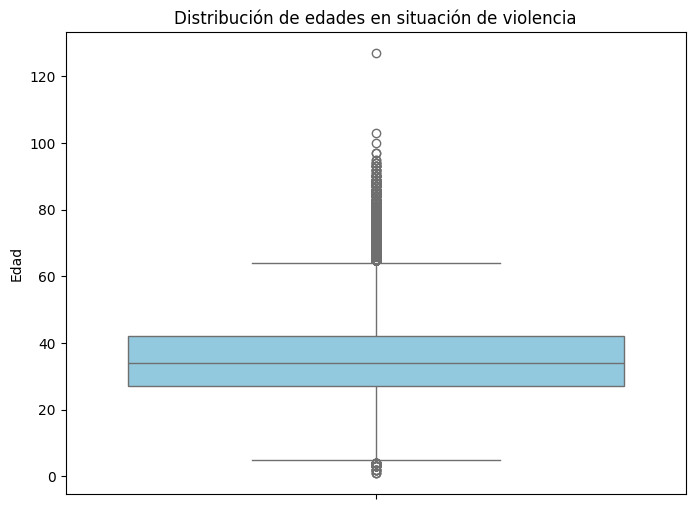

"'\nComo se observa en la primera exploración de los datos de las edades de las personas en situación de violencia\nlo datos van desde los 1 años hasta los 100 años. También se puede obvservar un caso de error en 127 años, probablemente siendo un error de tipeo.\n"

In [561]:
# Boxplot para visualizar la distribución de edades
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_completo, y='edad_persona_en_situacion_de_violencia', color='skyblue')
plt.title('Distribución de edades en situación de violencia')
plt.ylabel('Edad')
plt.xlabel('')
plt.show()


#Interpretación:
Como observamos en la primera exploración de los datos de las edades de las personas en situación de violencia lo datos van desde los 1 años hasta los 100 años, y la mayoría de los casos se da en el rango etareo entre 25 y 42 años aproximadamente. También se puede obvservar un caso de error en 127 años, probablemente siendo un error de tipeo.

Eliminamos las edades mayores a 100 años cosiderando que podían ser errores o casos muy aislados. Decidimos tomar el rango amplio de 1 a 100 años porque consideramos que había cantidad significativa de casos en ese grupo etareo, y las quisimos incluir.

In [562]:
#Dropna elimina las filas por defecto sino se le pasa axis=1
#Subset indica que solo deben verificarse los valores en la columna indicada.

# Eliminar las filas con valores NaN en la columna 'edad_persona_en_situacion_de_violencia'
df_completo = df_completo.dropna(subset=['edad_persona_en_situacion_de_violencia'])

# Eliminamos valores como 127 y 103 parecen ser inconsistentes o errores de entrada para edades humanas realistas.
df_completo = df_completo[(df_completo['edad_persona_en_situacion_de_violencia'] >= 1) &
                           (df_completo['edad_persona_en_situacion_de_violencia'] <= 100)]

#reseteamos los indices. Con drop = True nos aseguramos de descartar los indices anteriores
df_completo = df_completo.reset_index(drop=True)

df_completo['edad_persona_en_situacion_de_violencia'].describe()

# '''Eliminamos los Nan, y nos quedamos con las edades de las víctimas en 1 y 100 años'''

,edad_persona_en_situacion_de_violencia
count,64105.000000
mean,35.728726
std,12.643348
min,1.000000
25%,27.000000
50%,34.000000
75%,42.000000
max,100.000000


#Interpretación:
Con una cantidad de 64105 casos se puede observar que la media de las víctimas de violencia de genero está en los 35 años, con una desviación estandar de aproximadamente 12 años. La mayor cantidad de casos se encuentra en el rango entre los 27 y 42 años. La edad mínima es de 1 año y la máxima de 100.

Realizamos un histograma para ver la distribución de frecuencia de casos por edades.

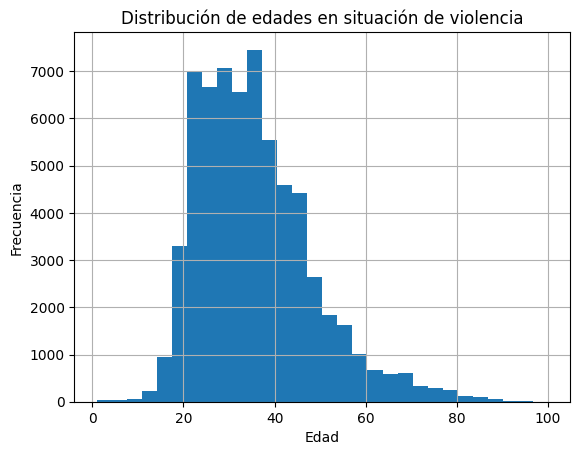

'Podemos ver como la edad de la mayoría de las víctimas de violencia de género ronda entre los  '

In [563]:
# Histograma para ver distribución
df_completo['edad_persona_en_situacion_de_violencia'].hist(bins=30)
plt.title('Distribución de edades en situación de violencia')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

'''Podemos ver como la edad de la mayoría de las víctimas de violencia de género ronda entre los  '''

#Interpretación:
Se puede observar como aumentan abruptamente los casos luego de la edad de 20 años llegando a su pico a la edad de 35, lo cual condice con la media, para descender luego a partir de los 40.

In [564]:
df_completo.head()

,fecha,prov_residencia_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora
0,2020-01-01,Buenos Aires,Mujer,39.0,No especificado,True,True,False,False,False,True,False,False,False,False,False,False,Ex pareja,Varon
1,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,True,True,False,False,False,True,False,False,False,False,False,False,Ex pareja,Varon
2,2020-01-01,Buenos Aires,Mujer,53.0,No especificado,False,True,False,False,False,True,False,False,False,False,False,False,Pareja,Varon
3,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,True,True,False,False,False,True,False,False,False,False,False,False,Pareja,Varon
4,2020-01-01,Buenos Aires,Mujer,23.0,Argentina,True,True,False,True,False,True,False,False,False,False,False,False,Ex pareja,Varon


Distribución de la edad por género en situación de violencia

<ipython-input-565-ed72c4483355>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


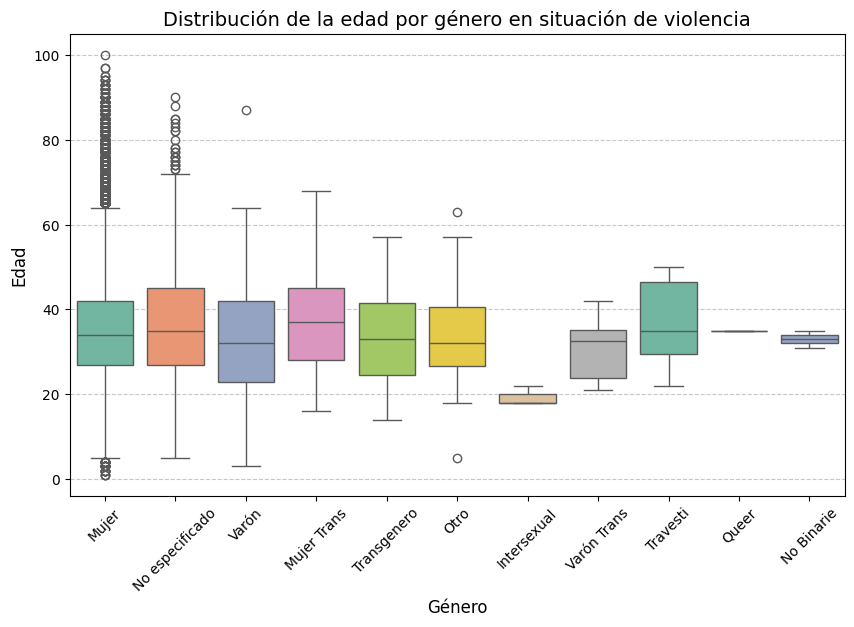

In [565]:
# Distribución de la edad por género en situación de violencia
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_completo,
    x='genero_persona_en_situacion_de_violencia',
    y='edad_persona_en_situacion_de_violencia',
    palette="Set2"
)
plt.title("Distribución de la edad por género en situación de violencia", fontsize=14)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Edad", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Interpretación:
Se puede ver claramente como el género 'Mujer' ocupa el mayor rango de edades de víctima de violencia de género, llegando la distribución de 1 a 100 años abarcando todo el espectro de posibilidades (de los datos).

Número de casos por provincia

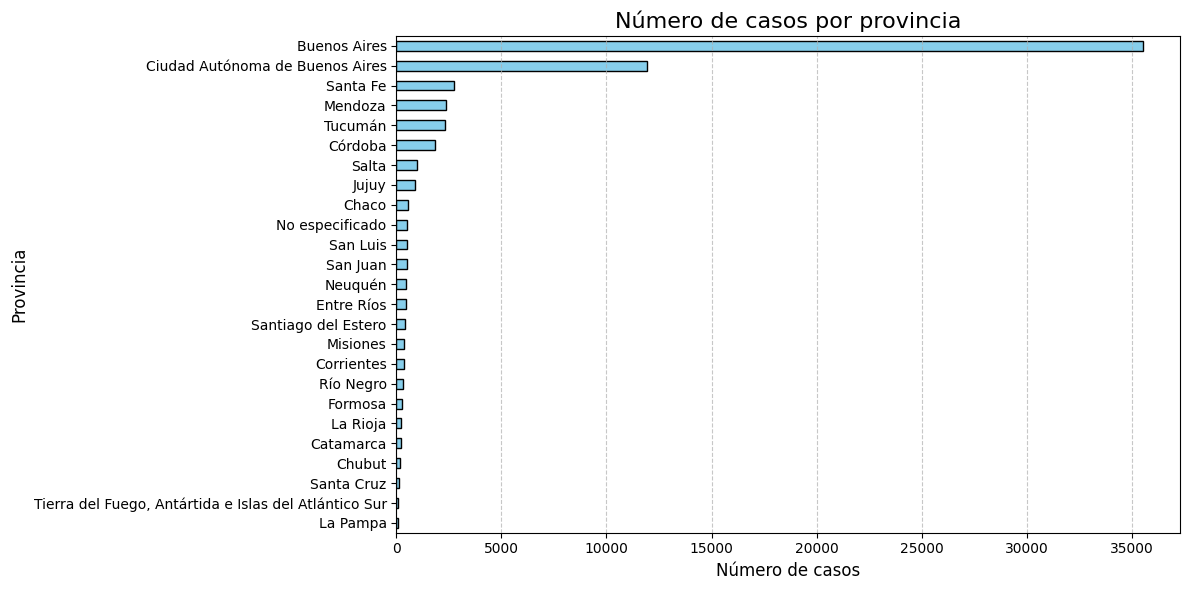

In [566]:
plt.figure(figsize=(12, 6))
df_completo['prov_residencia_persona_en_situacion_violencia'].value_counts().sort_values().plot(
    kind='barh',
    color='skyblue',
    edgecolor='black'
)

# Personalizar el gráfico
plt.title('Número de casos por provincia', fontsize=16)
plt.xlabel('Número de casos', fontsize=12)
plt.ylabel('Provincia', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#Interpretación:
Vemos cómo la provincia de Buenos Aires es la que recibió más llamados de casos de violencia con más de 35000 llamados en los 3 años contemplados.(2020-2021-2022)

Distribución de casos por género de la persona agresora.

<ipython-input-567-aa58308b59a1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_completo, x='genero_de_la_persona_agresora', palette='Set2')


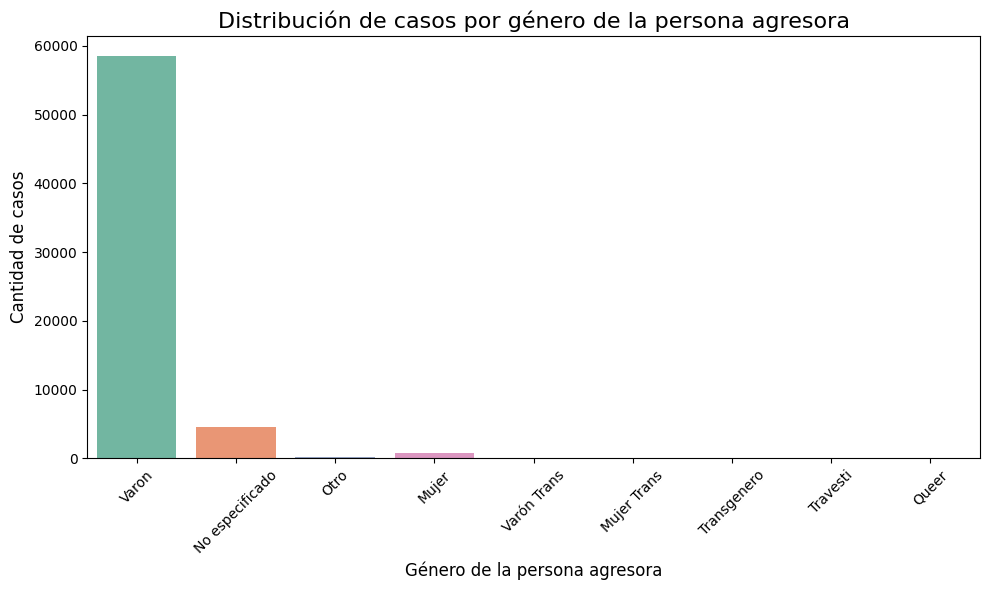

In [567]:
# Histograma de género de la persona agresora
plt.figure(figsize=(10, 6))
sns.countplot(data=df_completo, x='genero_de_la_persona_agresora', palette='Set2')

# Personalizar el gráfico
plt.title('Distribución de casos por género de la persona agresora', fontsize=16)
plt.xlabel('Género de la persona agresora', fontsize=12)
plt.ylabel('Cantidad de casos', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#Interpretación:
Con cási 60000 mil casos de violencia de género, el género 'Varón' lidera como género agresor.

Distribución de los diferentes tipos de vínculo con la persona agresora

<ipython-input-568-ba3c1dc7e2f2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_vinculos.index, y=conteo_vinculos.values, palette='viridis')


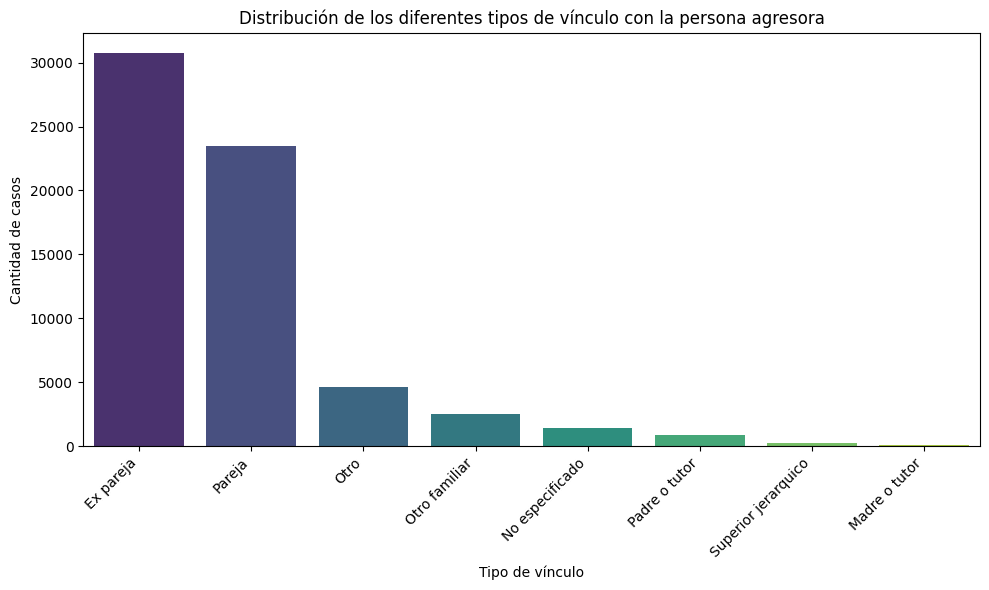

In [568]:
# Contar los diferentes tipos de 'vinculo_con_la_persona_agresora'
conteo_vinculos = df_completo['vinculo_con_la_persona_agresora'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=conteo_vinculos.index, y=conteo_vinculos.values, palette='viridis')

# Personalizar el gráfico
plt.title('Distribución de los diferentes tipos de vínculo con la persona agresora')
plt.xlabel('Tipo de vínculo')
plt.ylabel('Cantidad de casos')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#Interpretación:
Los vínculos entre los agresores y las víctimas de violencia de género que más se repiten son, con más de 30000 casos 'Ex Pareja' y con más de 20000 casos 'Pareja'.

In [569]:
df_completo.head()


,fecha,prov_residencia_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora
0,2020-01-01,Buenos Aires,Mujer,39.0,No especificado,True,True,False,False,False,True,False,False,False,False,False,False,Ex pareja,Varon
1,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,True,True,False,False,False,True,False,False,False,False,False,False,Ex pareja,Varon
2,2020-01-01,Buenos Aires,Mujer,53.0,No especificado,False,True,False,False,False,True,False,False,False,False,False,False,Pareja,Varon
3,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,True,True,False,False,False,True,False,False,False,False,False,False,Pareja,Varon
4,2020-01-01,Buenos Aires,Mujer,23.0,Argentina,True,True,False,True,False,True,False,False,False,False,False,False,Ex pareja,Varon


##**Análisis Temporal**

In [571]:
df_completo.describe()

,fecha,edad_persona_en_situacion_de_violencia
count,64105,64105.000000
mean,2021-06-04 10:33:22.252554496,35.728726
min,2020-01-01 00:00:00,1.000000
25%,2020-08-23 00:00:00,27.000000
50%,2021-05-22 00:00:00,34.000000
75%,2022-03-07 00:00:00,42.000000
max,2022-12-31 00:00:00,100.000000
std,NaN,12.643348


##Evolucion de llamadas a lo largo del tiempo

In [572]:
#Creamos diferentes columas para trabajar con las fechas. (Año, Mes, Año_Mes)

# Crear una columna para agrupar por año-mes
df_completo['año_mes'] = df_completo['fecha'].dt.to_period('M')

# Calcular la evolución de llamadas (conteo por mes)
evolucion_llamadas = df_completo.groupby('año_mes').size().reset_index(name='cantidad_llamadas')

# Ordenar los datos por período
evolucion_llamadas = evolucion_llamadas.sort_values('año_mes')

# Ver el resultado
evolucion_llamadas

,año_mes,cantidad_llamadas
0,2020-01,2107
1,2020-02,1697
2,2020-03,2040
3,2020-04,2342
4,2020-05,2225
5,2020-06,1852
6,2020-07,2104
7,2020-08,2148
8,2020-09,1879
9,2020-10,1871


Evolución de las llamadas (superposición por año)

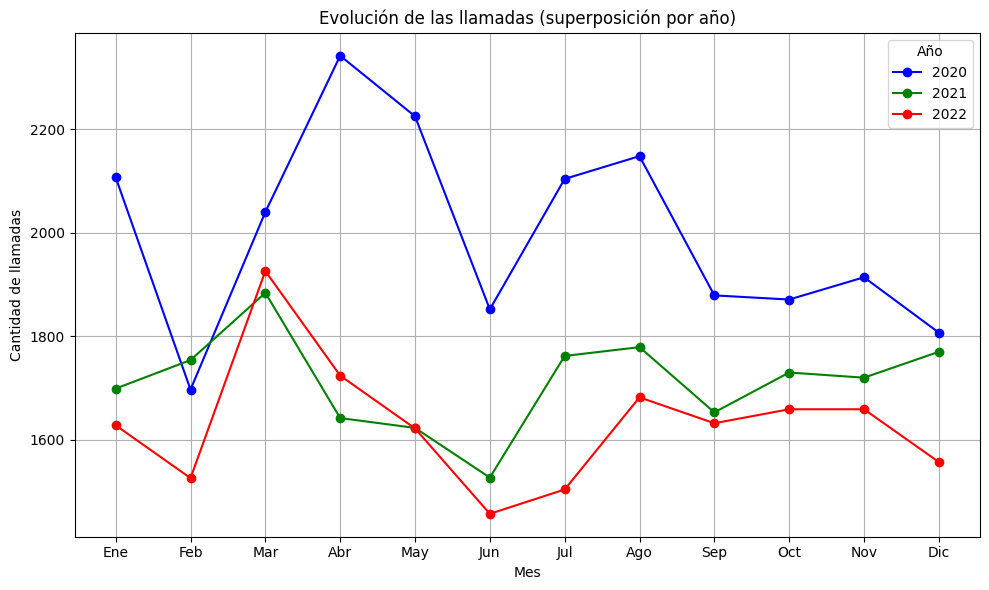

In [574]:
# Eliminar o imputar valores nulos
df_completo = df_completo.dropna(subset=['fecha'])  # Eliminar filas con fecha nula

# Crear una columna para agrupar por mes y otra para el año
df_completo['mes'] = df_completo['fecha'].dt.month
df_completo['año'] = df_completo['fecha'].dt.year

# Calcular la evolución de llamadas (conteo por mes y año)
evolucion_llamadas = df_completo.groupby(['mes', 'año']).size().reset_index(name='cantidad_llamadas')

# Forzar conversión de las columnas 'mes' y 'año' a enteros
evolucion_llamadas['mes'] = evolucion_llamadas['mes'].astype(int)
evolucion_llamadas['año'] = evolucion_llamadas['año'].astype(int)

# Crear un diccionario de colores por año
colores = {2020: 'blue', 2021: 'green', 2022: 'red'}

# Graficar
plt.figure(figsize=(10, 6))

for año, datos in evolucion_llamadas.groupby('año'):
    plt.plot(datos['mes'], datos['cantidad_llamadas'], label=f'{año}', color=colores[año], marker='o')

# Personalización del gráfico
plt.title('Evolución de las llamadas (superposición por año)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de llamadas')
plt.xticks(range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title="Año")
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


#Interpretación:
Podemos ver cómo claramente en el primer año de pandemia durante el covid, los casos de violencia de género se dispararon con respecto a los años siguientes.

Evolución total de las llamadas a lo largo del tiempo

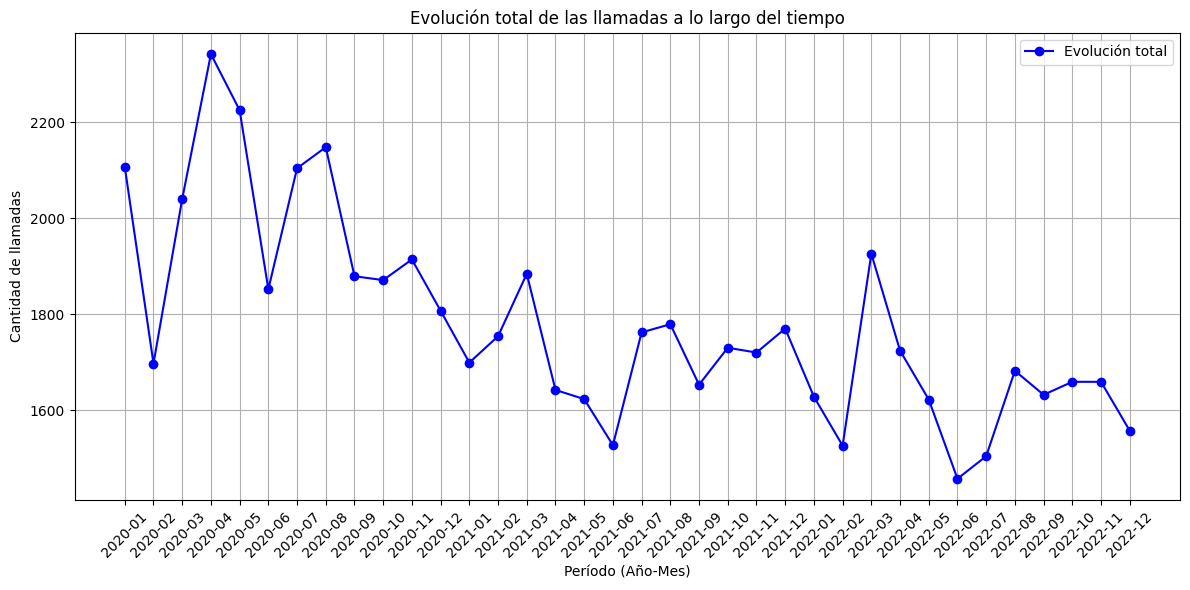

In [575]:
# Calcular la evolución de llamadas (conteo por mes)
evolucion_llamadas = df_completo.groupby('año_mes').size().reset_index(name='cantidad_llamadas')

# Preparar datos para graficar
evolucion_llamadas['año_mes'] = evolucion_llamadas['año_mes'].astype(str)

# Graficar una sola línea conectada
plt.figure(figsize=(12, 6))
plt.plot(evolucion_llamadas['año_mes'], evolucion_llamadas['cantidad_llamadas'], label='Evolución total', color='blue', marker='o')

# Personalización del gráfico
plt.title('Evolución total de las llamadas a lo largo del tiempo')
plt.xlabel('Período (Año-Mes)')
plt.ylabel('Cantidad de llamadas')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


#Interpretación:
Es probable que se observe un aumento significativo en las llamadas a partir de marzo 2020. Esto puede explicarse por el confinamiento obligatorio, que incrementó la convivencia forzada en contextos de violencia doméstica. Las restricciones de movilidad pudieron limitar el acceso a recursos de ayuda, pero al mismo tiempo, las líneas de ayuda telefónica se convirtieron en una de las principales vías de comunicación para las personas en situación de violencia.
Con un enfoque optimista podemos ver cómo los casos descienden a medida que avanzan los años.

In [577]:
# Filtrar solo las filas donde haya al menos un tipo de violencia reportado
df_violencia = df_completo[df_completo[tipos_de_violencia].sum(axis=1) > 0]

# Agrupar por 'mes_año' y 'genero_persona_en_situacion_de_violencia' y contar los casos
evolucion_violencia_genero_mes = df_violencia.groupby(['año_mes', 'genero_persona_en_situacion_de_violencia']).size().reset_index(name='cantidad_casos')

# Identificar el género con más casos por cada mes
genera_violencia_max_mes = evolucion_violencia_genero_mes.loc[evolucion_violencia_genero_mes.groupby('año_mes')['cantidad_casos'].idxmax()]

# Mostrar el resultado
evolucion_violencia_genero_mes
genera_violencia_max_mes


,año_mes,genero_persona_en_situacion_de_violencia,cantidad_casos
0,2020-01,Mujer,2099
5,2020-02,Mujer,1684
8,2020-03,Mujer,1992
14,2020-04,Mujer,2287
19,2020-05,Mujer,2182
24,2020-06,Mujer,1822
30,2020-07,Mujer,2064
36,2020-08,Mujer,2119
42,2020-09,Mujer,1855
47,2020-10,Mujer,1828


Evolución de los Casos de Violencia por Género a lo Largo del Tiempo

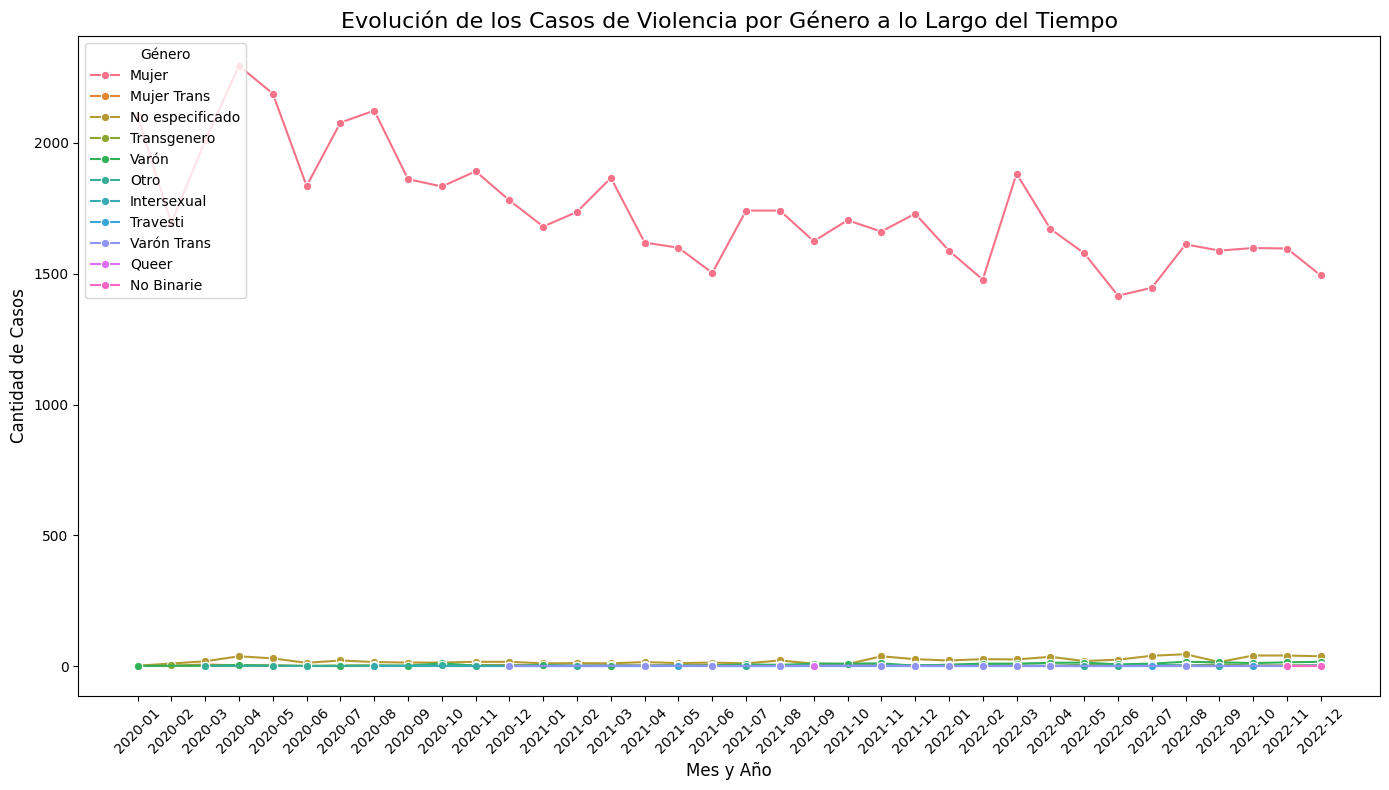

In [579]:
# # Asegurarse de que 'año_mes' está como un string (para evitar problemas de visualización)
df_completo['año_mes'] = df_completo['fecha'].dt.to_period('M').astype(str)

# Agrupar por 'año_mes' y 'genero_persona_en_situacion_de_violencia' y contar los casos
evolucion_violencia_genero_mes = df_completo.groupby(['año_mes', 'genero_persona_en_situacion_de_violencia']).size().reset_index(name='cantidad_casos')

# Graficar la evolución de los casos de violencia por género
plt.figure(figsize=(14, 8))

sns.lineplot(data=evolucion_violencia_genero_mes, x='año_mes', y='cantidad_casos', hue='genero_persona_en_situacion_de_violencia', marker='o')

# Personalización del gráfico
plt.title('Evolución de los Casos de Violencia por Género a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Mes y Año', fontsize=12)
plt.ylabel('Cantidad de Casos', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor visualización
plt.legend(title='Género', loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


#Interpretación:
Las mujeres son claramente el grupo más afectado por la violencia, con una cantidad significativamente más alta de casos en comparación con cualquier otro género. Esto es consistente con las estadísticas globales y locales sobre violencia de género, que históricamente afecta en mayor medida a las mujeres. Esto incluye diversas formas de violencia, como violencia física, psicológica, sexual, económica, entre otras.
Se puede observar un pico en el periodo 03 y 04 del 2020 coincidiendo con el aislamiento que se realizo en Argentina.

##**5-Preguntas de investigación**

Nos disposimos a averiguar cuales son los Tipos de Violencia Predominante por Provincia.

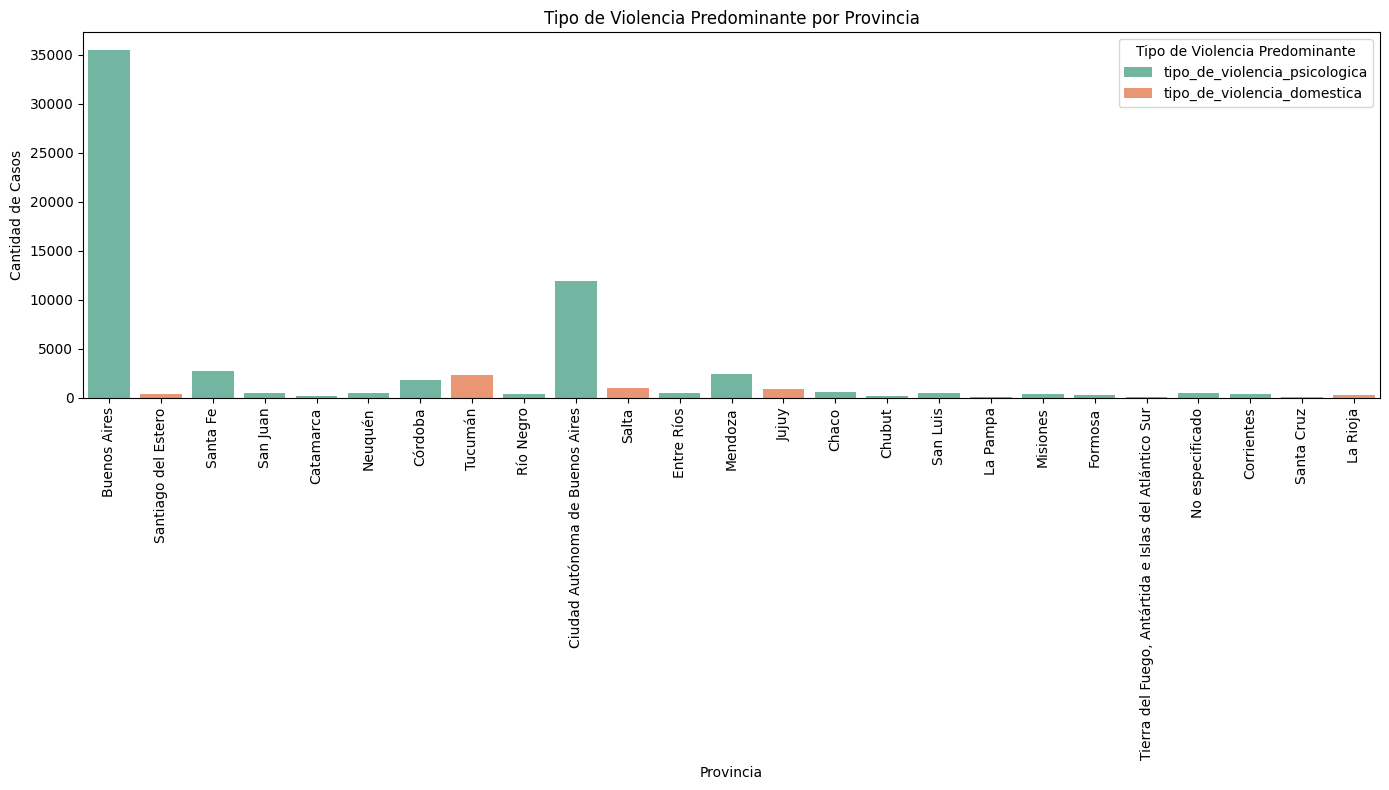

In [582]:
# Agrupar por provincia y sumar las incidencias de cada tipo de violencia, sin necesidad de convertir a enteros
violencia_por_provincia = df_completo.groupby('prov_residencia_persona_en_situacion_violencia')[tipos_de_violencia].sum()

# Identificar el tipo de violencia con mayor incidencia para cada provincia
violencia_por_provincia['tipo_de_violencia_predominante'] = violencia_por_provincia.idxmax(axis=1)

# Fusionar los datos agregados con el DataFrame original
df_completo = df_completo.merge(violencia_por_provincia[['tipo_de_violencia_predominante']], on='prov_residencia_persona_en_situacion_violencia', how='left')

# Visualizar los resultados
plt.figure(figsize=(14, 8))
sns.countplot(data=df_completo, x='prov_residencia_persona_en_situacion_violencia', hue='tipo_de_violencia_predominante', palette='Set2')

plt.title('Tipo de Violencia Predominante por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Casos')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visibilidad
plt.legend(title="Tipo de Violencia Predominante")
plt.tight_layout()
plt.show()



#Interpretación:
Como se puede observar, en la mayoría de provincias, el tipo de violencia ejercida por los agresores, es la violencia psicológica. En segundo lugar, la violencia más ejercida en algunas provincias es la violencia doméstica.

En este caso nos dispusimos a averiguar la violencia en menores de 18 aÑos en la provincia de Santa Fe

In [584]:
# Filtrar menores de 18 años, provincia "Santa Fe"
filtro = (
    (df_completo['edad_persona_en_situacion_de_violencia'] < 18) &
    (df_completo['prov_residencia_persona_en_situacion_violencia'] == 'Santa Fe')
)

# Aplicar el filtro al dataframe
menores_santa_fe = df_completo[filtro]

# Mostrar el resultado
menores_santa_fe.head()

,fecha,prov_residencia_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,...,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,año_mes,mes,año,tipo_de_violencia_predominante
284,2020-01-04,Santa Fe,Mujer,13.0,Argentina,True,True,True,False,False,...,False,False,False,False,Padre o tutor,Varon,2020-01,1,2020,tipo_de_violencia_psicologica
386,2020-01-05,Santa Fe,Mujer,14.0,Argentina,True,True,True,False,False,...,False,False,False,False,Padre o tutor,Varon,2020-01,1,2020,tipo_de_violencia_psicologica
1510,2020-01-23,Santa Fe,Mujer,9.0,No especificado,True,True,True,False,False,...,False,False,False,False,Otro familiar,Varon,2020-01,1,2020,tipo_de_violencia_psicologica
1645,2020-01-25,Santa Fe,Mujer,17.0,Argentina,True,True,True,False,False,...,False,False,False,False,Ex pareja,Varon,2020-01,1,2020,tipo_de_violencia_psicologica
1770,2020-01-27,Santa Fe,Mujer,17.0,No especificado,True,True,False,False,False,...,False,False,False,False,Pareja,Varon,2020-01,1,2020,tipo_de_violencia_psicologica


Cantidad de Llamadas de Menores de 18 años en Santa Fe

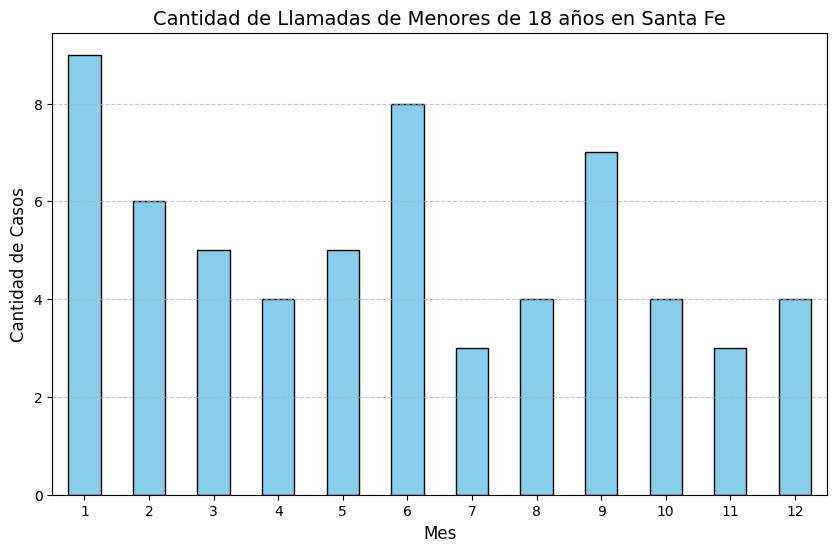

In [585]:
# Contar casos por mes
casos_por_mes = menores_santa_fe.groupby('mes').size()

# Graficar
plt.figure(figsize=(10, 6))
casos_por_mes.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad de Llamadas de Menores de 18 años en Santa Fe', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de Casos', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Interpretacion: El grafico nos muestra la cantidad de casos de violencia en menores de 18 años en la provincia de Santa Fe, siendo el mes de Enero y Junio los más altos.

Nos propusimos saber cuales eran los vínculos con la persona agresora en la Provincia de Santa Fe, teniendo en cuenta los menores de 18 años.

In [586]:
# Agrupar por 'vinculo_con_la_persona_agresora' y contar casos
vinculos_menores = menores_santa_fe['vinculo_con_la_persona_agresora'].value_counts()

# Mostrar el resultado
vinculos_menores

,count
vinculo_con_la_persona_agresora,
Pareja,17
Otro,14
Padre o tutor,12
Ex pareja,10
Otro familiar,6
Madre o tutor,2
No especificado,1


Casos de Menores de Edad por Vínculo en Santa Fe

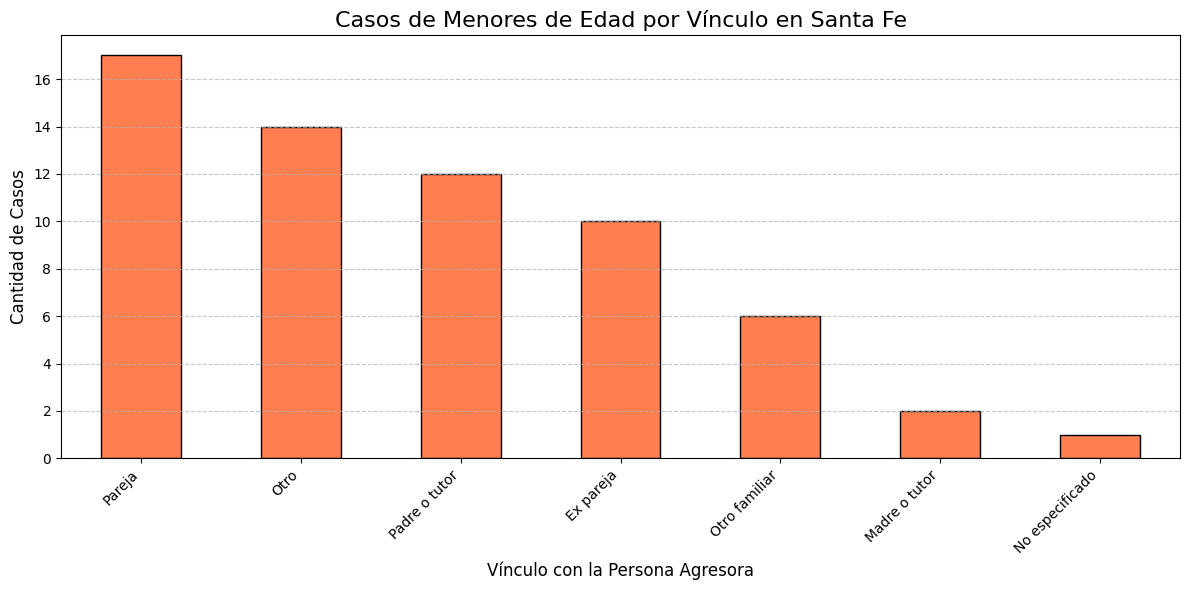

In [587]:
# Graficar la cantidad de casos por vínculo
plt.figure(figsize=(12, 6))
vinculos_menores.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Casos de Menores de Edad por Vínculo en Santa Fe', fontsize=16)
plt.xlabel('Vínculo con la Persona Agresora', fontsize=12)
plt.ylabel('Cantidad de Casos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Interpretacion: El grafico nos muestra la cantidad de casos de violencia en los menores de edad en la provincia de Santa Fe. La mayor cantidad de casos de violencia ejercida es la pareja, en segundo lugar fueron agresiones de otro (donde se desconoce el vínculo) y el tercer caso padre o tutor.

In [588]:
# Por ejemplo, si buscas solo los casos con "Padre o tutor" como vínculo
menores_santa_fe_padre = menores_santa_fe[
    menores_santa_fe['vinculo_con_la_persona_agresora'] == 'Padre o tutor'
]

Distribución de Edades de Menores en Situación de Violencia en Santa Fe

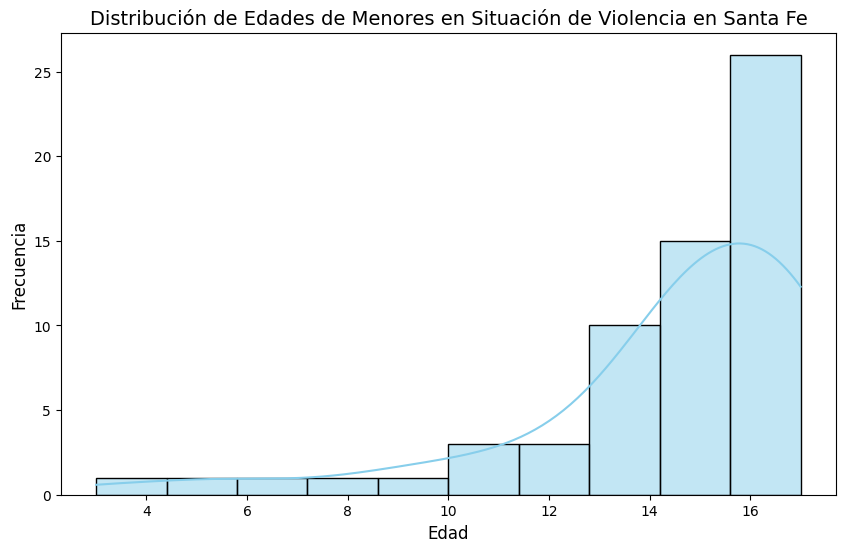

In [589]:
# Crear el gráfico de distribución de edades
plt.figure(figsize=(10, 6))
sns.histplot(menores_santa_fe['edad_persona_en_situacion_de_violencia'], kde=True, bins=10, color='skyblue')

# Títulos y etiquetas
plt.title('Distribución de Edades de Menores en Situación de Violencia en Santa Fe', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.show()

Interpretación:

Este gráfico de barras muestra la distribución de edades de menores de 18 años que sufren algun tipo de violencia en la provincia de Santa Fe. Se observa que la mayoría de las personas se agrupan en los 16 años lo que indica que ésta edad es la mas vulnerable. En contraste, los rangos de edad menos de 10 años tienen una baja cantidad de personas, con solo 2 y 1 persona. Y en la edad de los 12 años hay un aumento aunque despues decrece. Esto sugiere que la frecuencia se muestra mayormente en edades de 15-16 años.